<a href="https://colab.research.google.com/github/Fraciman/cv2/blob/main/FaceExpression_iman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
import matplotlib.pyplot as plt
from deepface import DeepFace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def take_photo(filename='photo.jpg',filename2 = 'photo1.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

 # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:

      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  
  #Detect emotion and select the highest percentage
  result = DeepFace.analyze(img,actions = ["emotion"] )

  #Put emotion in the image box
  cv2.putText(img, result['dominant_emotion'] ,(250,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
  print(f"User is {result['dominant_emotion']}")
  # save image
  cv2.imwrite(filename, img)
  
  return filename

<IPython.core.display.Javascript object>

(480, 640)
1/1 [==============================] - 0s 19ms/step
User is happy


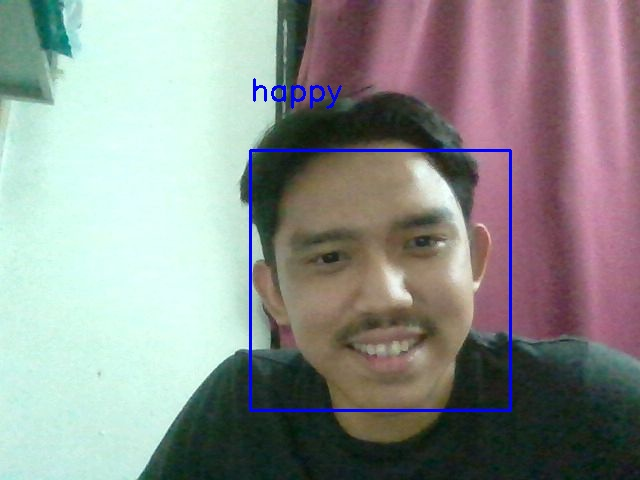

<IPython.core.display.Javascript object>

(480, 640)
1/1 [==============================] - 0s 20ms/step
User is angry


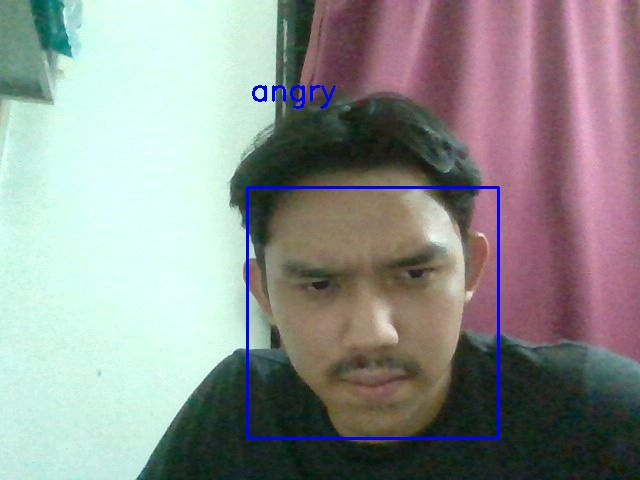

<IPython.core.display.Javascript object>

(480, 640)
1/1 [==============================] - 0s 20ms/step
User is neutral


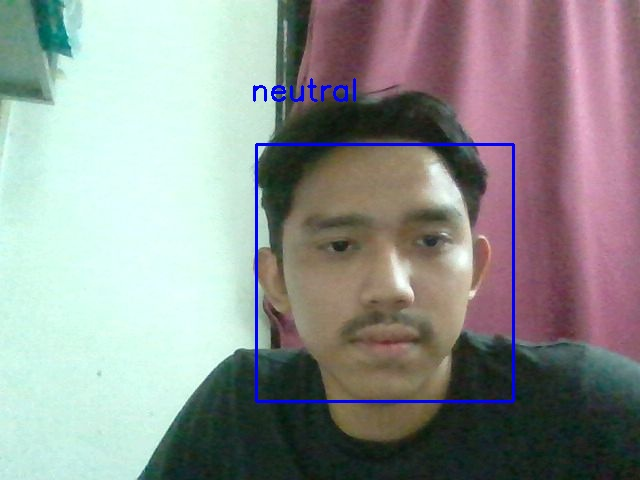

In [ ]:
for i in range(3):
  try:
    filename = take_photo('photo.jpg')
    #print('Saved to {}'.format(filename))
    
    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

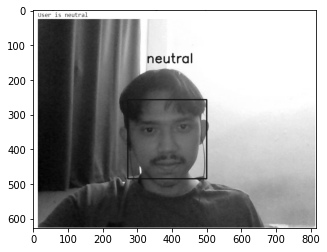

In [ ]:
path = "/content/drive/MyDrive/DLIVACV_workshop/day1/"
image = cv2.imread(path + "imanneutral.jpg")
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
blur = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(blur, cmap = "gray")

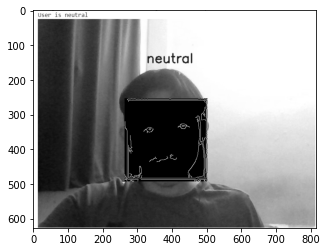

In [ ]:
faces = face_cascade.detectMultiScale(blur)
  # draw face bounding box on image
for (x,y,w,h) in faces:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      blur[y : y+h, x: x+w] = cv2.Canny(blur[y : y+h, x: x+w],30,90)
displayImage(blur)


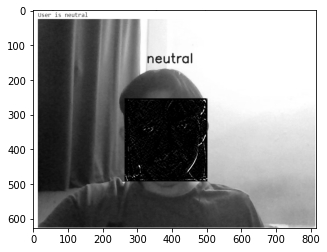

In [ ]:
blur = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(blur)
  # draw face bounding box on image
for (x,y,w,h) in faces:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      #rgb[y : y+h, x: x+w] = cv2.medianBlur(rgb[y : y+h, x: x+w],19)
      #blur[y : y+h, x: x+w] = cv2.Canny(blur[y : y+h, x: x+w],30,90)
      blur[y : y+h, x: x+w] = cv2.Sobel(blur[y : y+h, x: x+w], cv2.CV_8U,1,0,ksize=3)
      blur[y : y+h, x: x+w] = cv2.Sobel(blur[y : y+h, x: x+w], cv2.CV_8U,0,1,ksize=3)
      imgSobel = blur 
displayImage(imgSobel)


In [ ]:
path = "/content/drive/MyDrive/DLIVACV_workshop/day1/"

In [ ]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.imshow(image, cmap="gray")
        plt.show()

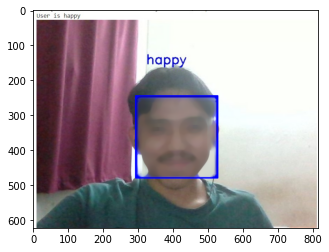

In [ ]:
img = cv2.imread(path+"imanhappy.jpg")
#color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


faces = face_cascade.detectMultiScale(img)
  # draw face bounding box on image
for (x,y,w,h) in faces:
      #imgBlur = cv2.GaussianBlur(img,(7,7),5)
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      #img[y : y+h, x: x+w] = cv2.GaussianBlur(img[y : y+h, x: x+w], (9,9),0)
      img[y : y+h, x: x+w] = cv2.medianBlur(img[y : y+h, x: x+w],19)
displayImage(img)



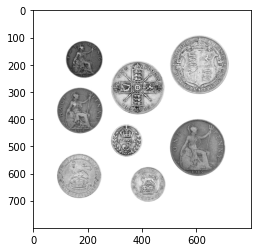

In [ ]:
path ="/content/drive/MyDrive/DLIVACV_workshop/day1/"
image = cv2.imread(path+'coin.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#color_converted = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray, cmap="gray")

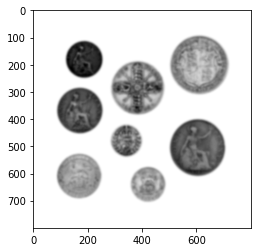

In [ ]:
blur = cv2.GaussianBlur(gray, (19,19),0)
plt.imshow(blur, cmap = "gray")

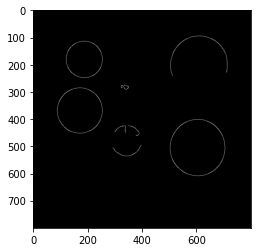

In [ ]:
canny = cv2.Canny(blur,30,150, 3)
plt.imshow(canny, cmap="gray")

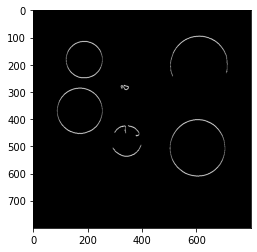

In [ ]:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.imshow(dilated, cmap = "gray")

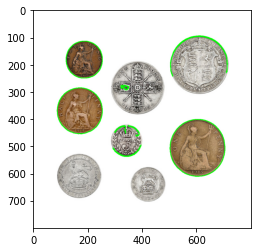

In [ ]:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)
plt.imshow(rgb)

In [ ]:
print("coin in the image: ", len(cnt))

coin in the image:  8
